In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score
import numpy as np

from mlxtend.classifier import OneRClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from skopt import BayesSearchCV
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB


In [75]:
x = pd.read_csv('X_train.csv')
x.head()

,Id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,21470,0.0,2.130706e+09,168.0,0.0,0.0,0.0,0.0,0.0,...,187028.0,109090.0,228040.0,89664.0,296964.0,78936.0,58.0,0.0,0.0,0.0
1,1,40856,NaN,5.540000e+02,0.0,0.0,0.0,0.0,0.0,0.0,...,526386.0,277000.0,612436.0,441664.0,84968.0,2204.0,78.0,0.0,0.0,0.0
2,2,28,NaN,2.130706e+09,20.0,0.0,0.0,0.0,0.0,0.0,...,406.0,80.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,38682,NaN,3.440000e+02,326.0,0.0,0.0,0.0,0.0,0.0,...,244622.0,116794.0,267896.0,307242.0,248998.0,164098.0,300820.0,11238.0,0.0,0.0
4,4,62218,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,499450.0,242448.0,458620.0,422742.0,390678.0,287052.0,427584.0,10146.0,0.0,0.0


In [76]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39900 entries, 0 to 39899
Columns: 171 entries, Id to eg_000
dtypes: float64(169), int64(2)
memory usage: 52.1 MB


In [77]:
x.describe()

,Id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,39900.000000,3.990000e+04,9121.000000,3.765900e+04,2.993400e+04,38240.000000,38240.000000,3.943400e+04,3.943400e+04,3.943400e+04,...,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,38087.000000,38088.000000
mean,19949.500000,6.094339e+04,0.728210,3.536753e+08,2.872309e+05,6.427877,10.552354,2.017626e+02,1.096192e+03,9.547083e+03,...,4.486738e+05,2.129917e+05,4.489956e+05,4.013561e+05,3.390282e+05,3.439853e+05,1.375559e+05,8.265914e+03,0.074514,0.236137
std,11518.282207,2.598214e+05,3.107561,7.927850e+08,4.961607e+07,112.420166,177.143548,1.823295e+04,3.272456e+04,1.563888e+05,...,1.121988e+06,5.316487e+05,1.129791e+06,1.130969e+06,1.102586e+06,1.626701e+06,4.350107e+05,4.968480e+04,3.610742,12.155503
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9974.750000,8.680000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.976000e+03,1.186000e+03,2.740000e+03,3.660000e+03,5.240000e+02,1.160000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,19949.500000,3.082300e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.351960e+05,1.121640e+05,2.236870e+05,1.907450e+05,9.458700e+04,4.204100e+04,3.992000e+03,0.000000e+00,0.000000,0.000000
75%,29924.250000,4.889650e+04,0.000000,9.700000e+02,4.340000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.394680e+05,2.175255e+05,4.667520e+05,4.037860e+05,2.769340e+05,1.682435e+05,1.397730e+05,1.998500e+03,0.000000,0.000000
max,39899.000000,4.294967e+07,134.000000,2.130707e+09,8.584298e+09,11044.000000,14186.000000,3.376892e+06,3.708310e+06,1.004568e+07,...,3.123272e+07,1.454922e+07,2.454544e+07,5.743524e+07,3.160781e+07,3.755240e+07,1.718575e+07,4.570398e+06,350.000000,1720.000000


{'< 7980': 147, '7980 < x <= 15960': 9, '15960 < x <= 23940': 8, '23940 < x <= 31920': 2, '31920 <=': 2}


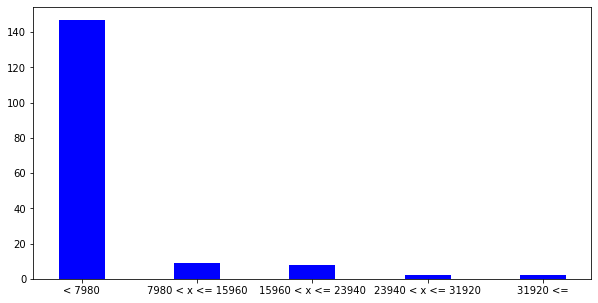

In [89]:
nulls_per_columns = np.array(x.isnull().sum(axis = 0))

data = {'< 7980': (nulls_per_columns< 7980).sum(),'7980 < x <= 15960':((nulls_per_columns >= 7980) * (nulls_per_columns > 15960)).sum(),'15960 < x <= 23940':((nulls_per_columns >= 15960) * (nulls_per_columns > 23940)).sum(),'23940 < x <= 31920':((nulls_per_columns >= 23940) * (nulls_per_columns > 31920)).sum(), '31920 <=':(nulls_per_columns >= 31920).sum()}
labels = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(labels, values, color ='blue',
        width = 0.4)

print(data)


{'< 34': 2, '34 < x <= 68': 169, '68 < x <= 102': 168, '102 < x <= 136': 168, '136 <=': 168}


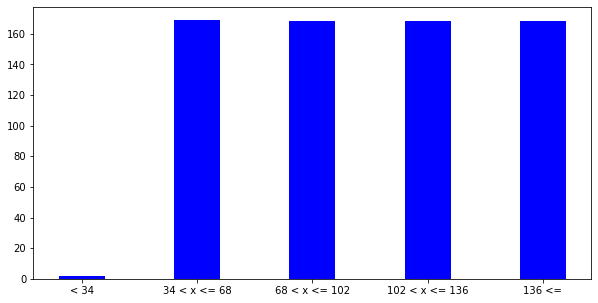

In [88]:
nulls_per_rows = np.array(x.isnull().sum(axis = 1))
data = {'< 34': (nulls_per_columns< 34).sum(),'34 < x <= 68':((nulls_per_columns >= 34) * (nulls_per_columns > 68)).sum(),'68 < x <= 102':((nulls_per_columns >= 68) * (nulls_per_columns > 102)).sum(),'102 < x <= 136':((nulls_per_columns >= 102) * (nulls_per_columns > 136)).sum(), '136 <=':(nulls_per_columns >= 136).sum()}
labels = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(labels, values, color ='blue',
        width = 0.4)

print(data)

In [9]:
x = pd.read_csv('X_train.csv')
x = x.dropna(how='any', axis=1)
print(x.shape)
x.head()

(39900, 2)


,Id,aa_000
0,0,21470
1,1,40856
2,2,28
3,3,38682
4,4,62218


In [64]:
x = pd.read_csv('X_train.csv')
x = x.dropna(how='any', axis=0)
print(x.shape)
x.head()

(406, 171)


,Id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
8,8,1172556,0.0,2.460000e+02,326.0,0.0,0.0,0.0,0.0,0.0,...,1150404.0,597678.0,1210002.0,1413330.0,1023394.0,116060.0,9216.0,0.0,0.0,0.0
193,193,317150,0.0,3.120000e+02,286.0,0.0,0.0,0.0,0.0,0.0,...,1104200.0,712778.0,1209740.0,1868408.0,5635604.0,167520.0,22676.0,0.0,0.0,0.0
216,216,152320,2.0,2.130706e+09,976.0,0.0,0.0,0.0,0.0,0.0,...,812488.0,427122.0,1165570.0,670038.0,773326.0,2602568.0,186036.0,0.0,0.0,0.0
227,227,125508,2.0,2.360000e+02,188.0,0.0,0.0,0.0,0.0,632.0,...,760758.0,344696.0,755012.0,823180.0,2665190.0,209944.0,1550.0,0.0,0.0,0.0
469,469,228454,0.0,1.640000e+02,160.0,0.0,0.0,0.0,0.0,0.0,...,771386.0,378508.0,1103544.0,1305552.0,6297456.0,121790.0,5772.0,0.0,0.0,0.0


In [4]:
#Dropping coulumns with too many Nan
x = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv')

perc = 75.0
min_count =  int(((100-perc)/100)*x.shape[0] + 1)
x = x.dropna( axis=1, 
                thresh=min_count)

x = x.fillna(0)
y = y.fillna(0)
print(x.shape)

(39900, 165)


In [5]:
x = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv')

x = x.drop(['Id'], axis=1)
y = y.drop(['Id'], axis=1)

x = x.fillna(0)
#x = x.fillna(x.mean())
#x = x.fillna(x.median())
y = y.fillna(0)

print(x.shape)
x.head()

(39900, 170)


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,21470,0.0,2.130706e+09,168.0,0.0,0.0,0.0,0.0,0.0,11968.0,...,187028.0,109090.0,228040.0,89664.0,296964.0,78936.0,58.0,0.0,0.0,0.0
1,40856,0.0,5.540000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,526386.0,277000.0,612436.0,441664.0,84968.0,2204.0,78.0,0.0,0.0,0.0
2,28,0.0,2.130706e+09,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,406.0,80.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38682,0.0,3.440000e+02,326.0,0.0,0.0,0.0,0.0,0.0,0.0,...,244622.0,116794.0,267896.0,307242.0,248998.0,164098.0,300820.0,11238.0,0.0,0.0
4,62218,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,499450.0,242448.0,458620.0,422742.0,390678.0,287052.0,427584.0,10146.0,0.0,0.0


The number of positive class points is:  722
The number of negative class points is:  39178


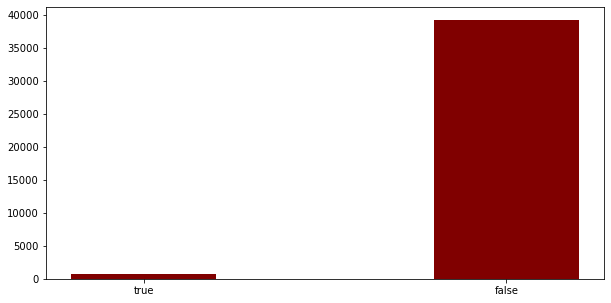

In [70]:
data = {'true':(y['Expected'] == 1).sum(), 'false':(y['Expected'] == 0).sum()}
labels = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(labels, values, color ='maroon',
        width = 0.4)

print('The number of positive class points is: ',(y['Expected'] == 1).sum())
print('The number of negative class points is: ',(y['Expected'] == 0).sum())


In [68]:
print('Are there any duplicates in the data set?')
x.duplicated().any()


Are there any duplicates in the data set?


False

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
oner = OneRClassifier()
oner.fit(np.array(x_train)[:20000,:], np.array(y_train).ravel()[:20000])


y_pred = oner.predict(np.array(x_test))
fbeta_score(np.array(y_test), np.array(y_pred), beta=3, average='binary')

0.06578947368421052

In [108]:
params = dict()
params['C'] = (1e-6, 100.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['degree'] = (1,5)
params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']

In [109]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
search = BayesSearchCV(estimator=xgb.XGBClassifier(), search_spaces=params, n_jobs=-1, cv=cv) #xgb.XGBClassifier()

x_for_tuning = x_train.head(100)
y_for_tuning = y_train.head(100)

search.fit(x_for_tuning, y_for_tuning)
y_pred = search.predict(x_test)
fbeta_score(y_test, y_pred, beta=3, average='binary')

c:\Users\Virag\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Virag\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Virag\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Virag\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Virag\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Virag\anaconda3\

[22:01:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "degree", "kernel" } are not used.



0.32324621733149933

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
search = BayesSearchCV(estimator=SVC(), search_spaces=params, n_jobs=-1, cv=cv) #xgb.XGBClassifier()

x_for_tuning = x_train.head(100)
y_for_tuning = y_train.head(100)

search.fit(x_for_tuning, y_for_tuning)

y_pred = search.predict(x_test)
fbeta_score(y_test, y_pred, beta=3, average='binary')

In [114]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
fbeta_score(y_test, y_pred, beta=3, average='binary')

c:\Users\Virag\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.49426934097421205

In [7]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
fbeta_score(y_test, y_pred, beta=3, average='binary')

0.7300275482093664

In [123]:
kmeans = KMeans(n_clusters=2, random_state=100).fit(x_train)
y_pred = kmeans.predict(x_test)
fbeta_score(y_test, y_pred, beta=3, average='binary')

c:\Users\Virag\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.007855459544383344

In [127]:
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
fbeta_score(y_test, y_pred, beta=3, average='binary')

c:\Users\Virag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.03843197540353575

In [148]:
clf = xgb.XGBClassifier(max_depth=11, n_estimators = 120, subsample = 0.8) #11->82
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
fbeta_score(y_test, y_pred, beta=3, average='binary')

0.7983193277310924

In [21]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)
clf = make_pipeline(StandardScaler(), xgb.XGBClassifier(max_depth=11, n_estimators = 120, subsample = 0.8))
clf.fit(x_train_std, y_train)
y_pred = clf.predict(x_test_std)
fbeta_score(y_test, y_pred, beta=3, average='binary')

0.7079646017699115

In [132]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
fbeta_score(y_test, y_pred, beta=3, average='binary')

C:\Users\Virag\AppData\Local\Temp/ipykernel_15776/3813642648.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


0.2330827067669173

In [137]:
clf = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
fbeta_score(y_test, y_pred, beta=3, average='binary')

c:\Users\Virag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1366742596810934

In [138]:
clf = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)
clf.fit(x_train_std, y_train)
y_pred = clf.predict(x_test_std)
fbeta_score(y_test, y_pred, beta=3, average='binary')

c:\Users\Virag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.706371191135734

In [142]:
clf = SGDClassifier(max_iter=10000, tol=1e-3)
clf.fit(x_train_std, y_train)
y_pred = clf.predict(x_test_std)
fbeta_score(y_test, y_pred, beta=3, average='binary')

c:\Users\Virag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7108350586611457

In [143]:
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=10000, tol=1e-3))
clf.fit(x_train_std, y_train)
y_pred = clf.predict(x_test_std)
fbeta_score(y_test, y_pred, beta=3, average='binary')

c:\Users\Virag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7049067035245334

In [144]:
clf = RidgeClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)
fbeta_score(y_test, y_pred, beta=3, average='binary')

c:\Users\Virag\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Virag\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.05362e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.49239681390296886

In [145]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
fbeta_score(y_test, y_pred, beta=3, average='binary')

c:\Users\Virag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.733240223463687

In [146]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
fbeta_score(y_test, y_pred, beta=3, average='binary')

C:\Users\Virag\AppData\Local\Temp/ipykernel_15776/4241703326.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


0.7464788732394367

In [73]:
gnb = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
fbeta_score(y_test, y_pred, beta=3, average='binary')

0.7848633496846532

In [69]:
#If I want to do cross validation:
n_splits = 5
#n_splits = 10
cv = KFold(n_splits=n_splits) 

dtc = DecisionTreeClassifier(random_state=42)
xgbc = xgb.XGBClassifier(eta = 0.2, gamma = 1, max_depth=11, n_estimators = 120, subsample = 0.8) #75.69 -> 0.8
sgdc = SGDClassifier(max_iter=10000, tol=1e-3)
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
gnb = GaussianNB()

dtc_score = []
xgbc_score = []
sgdc_score = []
abc_score = []
gnb_score = []

y = np.array(y).reshape(-1,1)
for train_index, test_index in cv.split(x):
    x_train, y_train = x.iloc[train_index,:], y[train_index,:]
    x_test, y_test = x.iloc[test_index,:], y[test_index,:]

    dtc.fit(x_train, y_train)
    xgbc.fit(x_train, y_train)
    sgdc.fit(x_train, y_train)
    abc.fit(x_train, y_train)
    gnb.fit(x_train, y_train)

    pred_dtc = dtc.predict(x_test)
    pred_xgbc = xgbc.predict(x_test)
    pred_sgdc = sgdc.predict(x_test)
    pred_abc = abc.predict(x_test)
    pred_gnb = gnb.predict(x_test)

    dtc_score.append(fbeta_score(y_test, pred_dtc, beta=3, average='binary'))
    xgbc_score.append(fbeta_score(y_test, pred_xgbc, beta=3, average='binary'))
    sgdc_score.append(fbeta_score(y_test, pred_sgdc, beta=3, average='binary'))
    abc_score.append(fbeta_score(y_test, pred_abc, beta=3, average='binary'))
    gnb_score.append(fbeta_score(y_test, pred_gnb, beta=3, average='binary'))
print('Dtc mean: ', np.mean(dtc_score))
print('Xgbc mean: ', np.mean(xgbc_score))
print('Sgdc mean: ', np.mean(sgdc_score))
print('Abc mean: ', np.mean(abc_score))
print('Gnb mean: ', np.mean(gnb_score))

c:\Users\Virag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Virag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Virag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Virag\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Dtc mean:  0.6771268925598128
Xgbc mean:  0.7569132840410563
Sgdc mean:  0.5589291690700916
Abc mean:  0.6914631821321193
Gnb mean:  0.758293150474971


In [74]:
x_val = pd.read_csv('X_test.csv')
x_val = x_val.drop(['Id'], axis=1)
x_val = x_val.fillna(0)

y_val = clf.predict(x_val)
y_val = pd.DataFrame(y_val)
y_val.columns = ['Predicted']
y_val.head()
y_val.to_csv('y_val.csv')